In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-test-set/test.csv
/kaggle/input/titanicdataset-traincsv/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/titanicdataset-traincsv/train.csv")
test = pd.read_csv("/kaggle/input/titanic-test-set/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

Percentage of women who survived 74.20382165605095
Percentage of men who survived 18.890814558058924


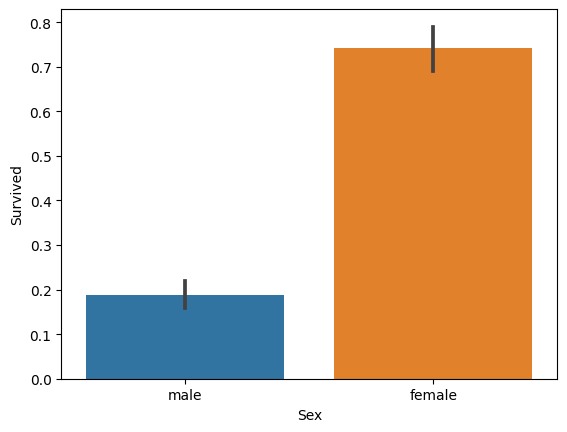

In [9]:
sns.barplot(x='Sex',y="Survived",data=train)
#Print percentage
print("Percentage of women who survived",train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

print("Percentage of men who survived",train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

Pclass

Percentage of Pclass =1 who survived 62.96296296296296
Percentage of Pclass =2 who survived 47.28260869565217
Percentage of Pclass =3 who survived 24.236252545824847


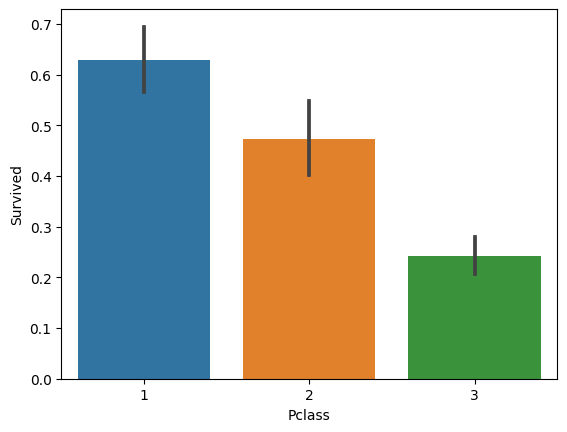

In [10]:
sns.barplot(x='Pclass',y="Survived",data=train)
#Print percentage
print("Percentage of Pclass =1 who survived",train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass =2 who survived",train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass =3 who survived",train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


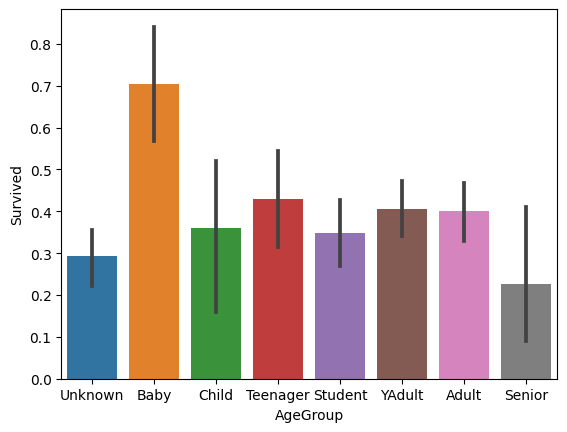

In [11]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','YAdult','Adult','Senior']
train['AgeGroup'] = pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels=labels)
sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.show()

In [12]:
train = train.drop(['Ticket','Cabin','Fare'],axis=1)
test = test.drop(['Ticket','Cabin','Fare'],axis=1)

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'AgeGroup'],
      dtype='object')

Dealing with missing values

In [14]:
print("No of people embarking in Southhampton(S) : ")
Southampton = train[train['Embarked']=='S'].shape[0]
print(Southampton)
print("No of people embarking in Cherbourg(C) : ")
Cherbourg = train[train['Embarked']=='C'].shape[0]
print(Cherbourg)
print("No of people embarking in Queenstown(Q) : ")
Queenstown = train[train['Embarked']=='Q'].shape[0]
print(Queenstown)

No of people embarking in Southhampton(S) : 
644
No of people embarking in Cherbourg(C) : 
168
No of people embarking in Queenstown(Q) : 
77


In [15]:
train = train.fillna({'Embarked':'S'})

In [16]:
combine = [train,test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col',
                                               'Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [18]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [19]:
#list(train[['Title','Survived']].groupby(['Title'],as_index=False).mean()['Title'])
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}

for dataset in combine:
    # Standardize Title column values
    dataset['Title'] = dataset['Title'].str.strip().str.capitalize()
    
    # Apply mapping
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
    # Fill NaN values with 0
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,YAdult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,YAdult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,YAdult,1


In [24]:
mr_age = train[train['Title']==1]['AgeGroup'].mode() #YAdult
miss_age = train[train['Title']==2]['AgeGroup'].mode() #Student
mrs_age = train[train['Title']==3]['AgeGroup'].mode() #Adult
master_age = train[train['Title']==4]['AgeGroup'].mode() #Baby
royal_age = train[train['Title']==5]['AgeGroup'].mode()  #Adult
rare_age = train[train['Title']==6]['AgeGroup'].mode()  #Adult

age_title_map = {1:'YAdult',2:'Student',3:'Adult',4:'Baby',5:'Adult',6:'Adult'}

#Replacing Unknown Values in the Age Group

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i]=="Unknown":
        train['AgeGroup'][i]=age_title_map[train['Title'][i]]

for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i]=="Unknown":
        test['AgeGroup'][i]=age_title_map[train['Title'][i]]

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transform = ['Sex','AgeGroup','Embarked']

for i in transform:
    train[i]=le.fit_transform(train[i])

for i in transform:
    test[i]=le.fit_transform(test[i])

In [35]:
train,test

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    1  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
 2                               Heikkinen, Miss. Laina    0  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
 4                             Allen, Mr. William Henry    1  35.0      0   
 ..                                                 ...  ...   ...  

## Machine Learning Model

In [46]:
X_train = train.drop(['PassengerId','Name','Survived'],axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId','Name'],axis=1)


In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
pred = lr_model.predict(X_test)

In [50]:
ids = test['PassengerId']
output = pd.DataFrame({'PassengerId':ids,'Survived':pred})
output.to_csv('Submission.csv',index=False)